In [89]:
!pip install scanpy

In [72]:
import scanpy as sc
#import os
#notebook_path = os.path.abspath("Sc_toturial.ipynb")

In [23]:
#adata=sc.read('Users/hawraal-ghafli/Downloads/GSE171524_RAW/GSM5226574_C51ctr_raw_counts.csv.gz').T
adata=sc.read_csv('./GSM5226574_C51ctr_raw_counts.csv').T
adata

KeyboardInterrupt: 

In [ ]:
adata.obs

In [ ]:
adata.var

In [ ]:
adata.X

In [ ]:
adata.X.shape

# Double removal - optional but preferred 

In [39]:
#!pip install scvi-tools

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 351.0/351.0 kB 2.5 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.6/89.6 kB 1.8 MB/s eta 0:00:00a 0:00:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 225.9/225.9 kB 4.0 MB/s eta 0:00:0000:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 7.0 MB/s eta 0:00:0000:01:00:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.0/75.0 MB 4.6 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 6.1 MB/s eta 0:00:0000:0100:01m
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 2.1 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproj

In [9]:
import scvi

In [20]:
adata

In [11]:
sc.pp.filter_genes(adata, min_cells=10)

In [12]:
#!pip install --user scikit-misc

In [13]:
from skmisc.loess import loess
sc.pp.highly_variable_genes(adata, n_top_genes=2000, subset=True, flavor='seurat_v3')

In [29]:
#!pip install --pre torch torchvision torchaudio --extra-index-url https://download.pytorch.org/whl/nightly/cpu

Looking in indexes: https://pypi.org/simple, https://download.pytorch.org/whl/nightly/cpu


In [30]:
#import torch
#if torch.backends.mps.is_available():
  #  mps_device = torch.device("mps")
  #  x = torch.ones(1, device=mps_device)
  #  print(x)
#else:
 #   print ("MPS device not found.")

MPS device not found.


In [31]:
scvi.model.SCVI.setup_anndata(adata)
vae=scvi.model.SCVI(adata)
vae.train()

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


Epoch 400/400: 100%|██████████████████████████████████████████████████████████████████████████| 400/400 [20:57<00:00,  2.54s/it, v_num=1, train_loss_step=327, train_loss_epoch=324]

`Trainer.fit` stopped: `max_epochs=400` reached.


Epoch 400/400: 100%|██████████████████████████████████████████████████████████████████████████| 400/400 [20:57<00:00,  3.14s/it, v_num=1, train_loss_step=327, train_loss_epoch=324]


In [33]:
solo=scvi.external.SOLO.from_scvi_model(vae)
solo.train()

INFO     Creating doublets, preparing SOLO model.                                                                  


GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


Epoch 266/400:  66%|██████████████████████████████████████████████▌                       | 266/400 [02:10<01:05,  2.04it/s, v_num=1, train_loss_step=0.372, train_loss_epoch=0.295]
Monitored metric validation_loss did not improve in the last 30 records. Best score: 0.273. Signaling Trainer to stop.


In [38]:
df= solo.predict()
df['prediction']=solo.predict(soft=False)
df.index=df.index.map(lambda x: x[:-2])
df

,doublet,singlet,prediction
TAGGTACCATGGCCAC-1,0.386816,-1.071691,doublet
ATTCACTGTAACAGGC-1,0.888092,-1.557825,doublet
TAACTTCCAACCACGC-1,0.039430,-0.189114,doublet
TTGGGTACACGACAAG-1,-0.241861,-0.658376,doublet
AGGCCACAGAGTCACG-1,0.352844,-0.922869,doublet
...,...,...,...
CGCCATTGTTTGCCGG-1,-1.612445,1.774865,singlet
CACTGGGGTCTACGTA-1,-1.899798,2.349503,singlet
CATACTTGTAGAGGAA-1,-1.711422,2.348219,singlet
TTTGGTTTCCACGGAC-1,-3.540216,3.859332,singlet


In [39]:
df.groupby('prediction').count()

,doublet,singlet
prediction,,
doublet,1348,1348
singlet,4751,4751


In [179]:
df['dif']=df.doublet- df.singlet
df

,doublet,singlet,prediction,df,dif
TAGGTACCATGGCCAC-1,0.386816,-1.071691,doublet,1.458507,1.458507
ATTCACTGTAACAGGC-1,0.888092,-1.557825,doublet,2.445916,2.445916
TAACTTCCAACCACGC-1,0.039430,-0.189114,doublet,0.228544,0.228544
TTGGGTACACGACAAG-1,-0.241861,-0.658376,doublet,0.416514,0.416514
AGGCCACAGAGTCACG-1,0.352844,-0.922869,doublet,1.275713,1.275713
...,...,...,...,...,...
CGCCATTGTTTGCCGG-1,-1.612445,1.774865,singlet,-3.387310,-3.387310
CACTGGGGTCTACGTA-1,-1.899798,2.349503,singlet,-4.249300,-4.249300
CATACTTGTAGAGGAA-1,-1.711422,2.348219,singlet,-4.059641,-4.059641
TTTGGTTTCCACGGAC-1,-3.540216,3.859332,singlet,-7.399549,-7.399549


In [42]:
import seaborn as sns

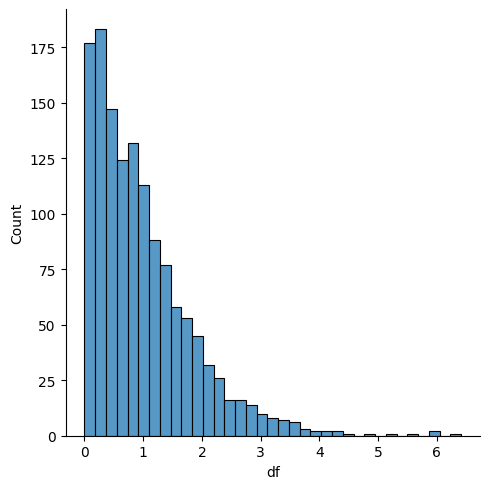

In [43]:
sns.displot(df[df.prediction == 'doublet'],x='df')

In [46]:
doublets= df[(df.prediction == 'doublet')& (df.df>1)]
doublets


,doublet,singlet,prediction,df
TAGGTACCATGGCCAC-1,0.386816,-1.071691,doublet,1.458507
ATTCACTGTAACAGGC-1,0.888092,-1.557825,doublet,2.445916
AGGCCACAGAGTCACG-1,0.352844,-0.922869,doublet,1.275713
CACTGAAGTCGAAGCA-1,0.736430,-1.305110,doublet,2.041540
ACTGATGTCTGCACCT-1,1.936719,-2.002177,doublet,3.938897
...,...,...,...,...
CGCATGGAGTAAGAGG-1,0.653834,-0.665302,doublet,1.319136
CCTCCTCGTGTGGACA-1,0.833287,-0.715107,doublet,1.548395
ATCTCTACAATGCAGG-1,0.654352,-0.664443,doublet,1.318795
CCACGTTGTAGAATGT-1,0.773864,-0.784831,doublet,1.558695


In [49]:
adata=sc.read_csv('./GSM5226574_C51ctr_raw_counts.csv').T

In [50]:
adata.obs['doublet']=adata.obs.index.isin(doublets.index)

In [51]:
adata.obs

,doublet
TAGGTACCATGGCCAC-1_1,False
ATTCACTGTAACAGGC-1_1,False
TAACTTCCAACCACGC-1_1,False
TTGGGTACACGACAAG-1_1,False
AGGCCACAGAGTCACG-1_1,False
...,...
CGCCATTGTTTGCCGG-1_1,False
CACTGGGGTCTACGTA-1_1,False
CATACTTGTAGAGGAA-1_1,False
TTTGGTTTCCACGGAC-1_1,False


In [52]:
adata=adata[~adata.obs.doublet]

In [53]:
adata

View of AnnData object with n_obs × n_vars = 6099 × 34546
    obs: 'doublet'

adata

In [54]:
#Preprocessing 
adata.var

""
AL627309.1
AL627309.5
AL627309.4
AL669831.2
LINC01409
...
VN1R2
AL031676.1
SMIM34A
AL050402.1


In [55]:
adata.var[adata.var.index.str.startswith('MT-')]

""
MT-ND1
MT-ND2
MT-CO1
MT-CO2
MT-ATP8
MT-ATP6
MT-CO3
MT-ND3
MT-ND4L
MT-ND4


In [56]:
#annotate mitochendiral genes 
adata.var['mt']= adata.var.index.str.startswith('MT-')

/var/folders/x7/p9n13pm92719fhyzl04cy7th0000gn/T/ipykernel_51047/4129575233.py:2: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var['mt']= adata.var.index.str.startswith('MT-')


In [57]:
adata.var

,mt
AL627309.1,False
AL627309.5,False
AL627309.4,False
AL669831.2,False
LINC01409,False
...,...
VN1R2,False
AL031676.1,False
SMIM34A,False
AL050402.1,False


In [58]:
import pandas as pd

In [59]:
ribo_url= 'http://software.broadinstitute.org/gsea/msigdb/download_geneset.jsp?geneSetName=KEGG_RIBOSOME&fileType=txt'

In [60]:
ribo_genes=pd.read_table(ribo_url, skiprows=2, header=None)
ribo_genes

,0
0,FAU
1,MRPL13
2,RPL10
3,RPL10A
4,RPL10L
...,...
83,RPS9
84,RPSA
85,RSL24D1
86,RSL24D1P11


In [61]:
adata.var['ribo']=adata.var_names.isin(ribo_genes[0].values)

In [92]:
adata.var

,mt,ribo,n_cells_by_counts,mean_counts,pct_dropout_by_counts,total_counts
AL627309.1,False,False,8,0.001312,99.868831,8.0
AL627309.5,False,False,33,0.005411,99.458928,33.0
AL627309.4,False,False,4,0.000656,99.934415,4.0
AL669831.2,False,False,2,0.000328,99.967208,2.0
LINC01409,False,False,274,0.048697,95.507460,297.0
...,...,...,...,...,...,...
VN1R2,False,False,0,0.000000,100.000000,0.0
AL031676.1,False,False,0,0.000000,100.000000,0.0
SMIM34A,False,False,0,0.000000,100.000000,0.0
AL050402.1,False,False,0,0.000000,100.000000,0.0


In [93]:
adata.obs

,doublet,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt,total_counts_ribo,pct_counts_ribo
TAGGTACCATGGCCAC-1_1,False,6764,24256.0,153.0,0.630772,55.0,0.226748
ATTCACTGTAACAGGC-1_1,False,6686,19020.0,404.0,2.124080,115.0,0.604627
TAACTTCCAACCACGC-1_1,False,5158,15645.0,221.0,1.412592,211.0,1.348674
TTGGGTACACGACAAG-1_1,False,4900,15220.0,3.0,0.019711,5.0,0.032852
AGGCCACAGAGTCACG-1_1,False,5544,13217.0,417.0,3.155028,82.0,0.620413
...,...,...,...,...,...,...,...
CGCCATTGTTTGCCGG-1_1,False,355,410.0,3.0,0.731707,0.0,0.000000
CACTGGGGTCTACGTA-1_1,False,346,403.0,0.0,0.000000,0.0,0.000000
CATACTTGTAGAGGAA-1_1,False,360,410.0,2.0,0.487805,0.0,0.000000
TTTGGTTTCCACGGAC-1_1,False,299,405.0,0.0,0.000000,2.0,0.493827


In [174]:
sc.pp.calculate_qc_metrics(adata, qc_vars=['mt', 'ribo'], percent_top= None, log1p= False, inplace= True )

In [96]:
#get rid  of genes ffound in fewer than 3 cells
sc.pp.filter_genes(adata, min_cells=3)

In [97]:
#sort cellscounts
adata.var.sort_values('n_cells_by_counts')

,mt,ribo,n_cells_by_counts,mean_counts,pct_dropout_by_counts,total_counts,n_cells
AL929091.1,False,False,3,0.000492,99.950812,3.0,3
AC006441.3,False,False,3,0.000492,99.950812,3.0,3
AC022017.1,False,False,3,0.000492,99.950812,3.0,3
AC024597.1,False,False,3,0.000492,99.950812,3.0,3
PCARE,False,False,3,0.000492,99.950812,3.0,3
...,...,...,...,...,...,...,...
AKAP13,False,False,4458,3.054271,26.906050,18628.0,4458
NEAT1,False,False,4546,5.314150,25.463191,32411.0,4546
MBNL1,False,False,4554,2.877029,25.332022,17547.0,4554
ZBTB20,False,False,4699,2.601082,22.954583,15864.0,4699


In [98]:
adata.obs.sort_values('total_counts')

,doublet,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt,total_counts_ribo,pct_counts_ribo
TGGTACAGTTGGTGTT-1_1,False,323,401.0,0.0,0.000000,0.0,0.000000
CTCAACCGTTTGGGAG-1_1,False,325,401.0,0.0,0.000000,0.0,0.000000
GTCGTTCTCCAAGGGA-1_1,False,300,401.0,0.0,0.000000,0.0,0.000000
CGAGAAGGTGAACTAA-1_1,False,308,401.0,0.0,0.000000,0.0,0.000000
CAGGGCTTCATGCGGC-1_1,False,330,401.0,7.0,1.745636,1.0,0.249377
...,...,...,...,...,...,...,...
AGGCCACAGAGTCACG-1_1,False,5544,13217.0,417.0,3.155028,82.0,0.620413
TTGGGTACACGACAAG-1_1,False,4900,15220.0,3.0,0.019711,5.0,0.032852
TAACTTCCAACCACGC-1_1,False,5158,15645.0,221.0,1.412592,211.0,1.348674
ATTCACTGTAACAGGC-1_1,False,6686,19020.0,404.0,2.124080,115.0,0.604627


In [ ]:
#great...authors already filtered cells with 200 or less reads>skip this step
#get rid of cells with lower than 200 genes
sc.pp.filter_cells(adata, min_genes=200)

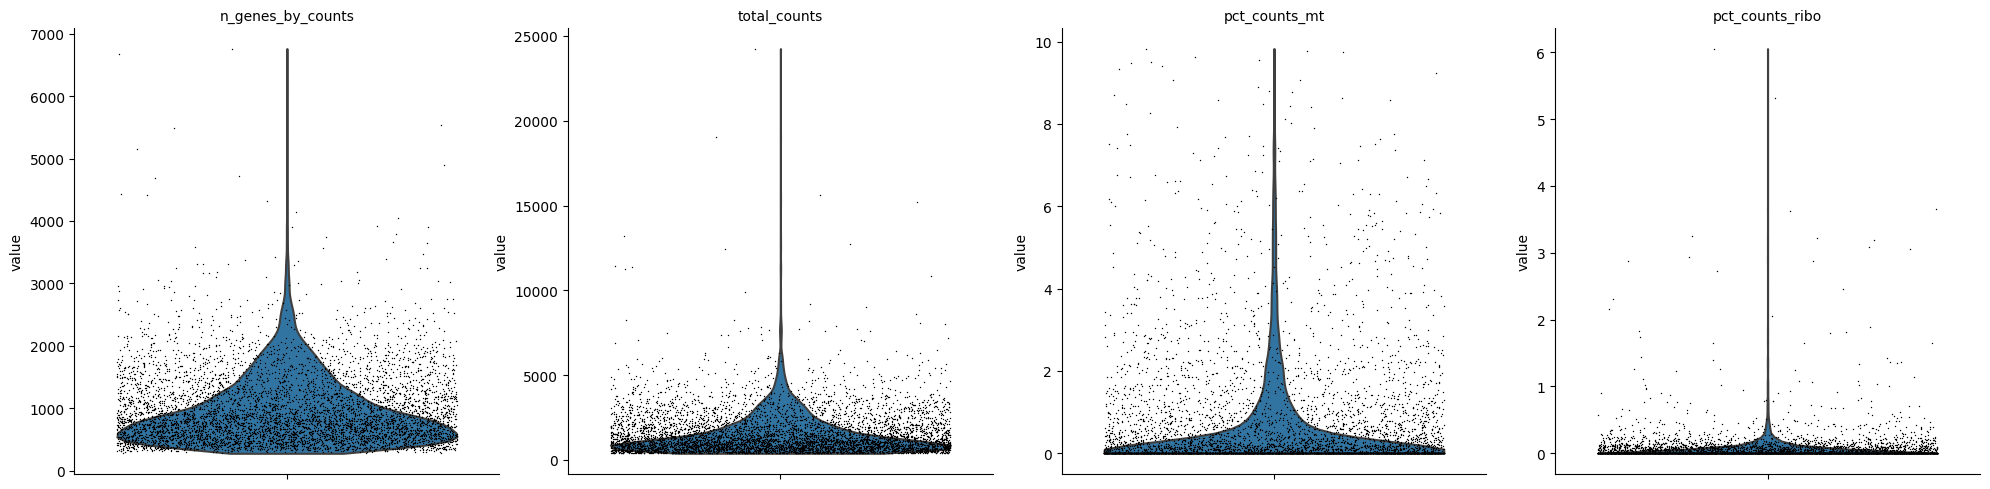

In [103]:
sc.pl.violin(adata,['n_genes_by_counts', 'total_counts','pct_counts_mt', 'pct_counts_ribo'], jitter=0.4, multi_panel=True)

In [101]:
import numpy as np

In [102]:
upper_lim=np.quantile(adata.obs.n_genes_by_counts.values, .98)
#upper_lim=300

In [104]:
upper_lim

2479.08

In [105]:
adata=adata[adata.obs.pct_counts_mt<20]

In [106]:
adata=adata[adata.obs.pct_counts_ribo<2]

In [107]:
adata

View of AnnData object with n_obs × n_vars = 6082 × 24660
    obs: 'doublet', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo'
    var: 'mt', 'ribo', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'n_cells'

# Data is now clean> moving to 'normalization step'

In [109]:
adata.X.sum(axis=1)

ArrayView([24243., 18994., 15631., ...,   410.,   405.,   410.],
          dtype=float32)

In [110]:
sc.pp.normalize_total(adata, target_sum=1e4) #normalize every cell to 10,000 UMI

/Users/hawraal-ghafli/.pyenv/versions/3.9.1/lib/python3.9/site-packages/scanpy/preprocessing/_normalization.py:170: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


In [111]:
adata.X.sum(axis=1)

array([ 9999.999,  9999.999, 10000.   , ..., 10000.   , 10000.   ,
       10000.   ], dtype=float32)

In [113]:
sc.pp.log1p(adata)

In [114]:
adata.X.sum(axis=1)

array([3383.8    , 3535.6821 , 3081.2656 , ...,  525.3356 ,  443.33755,
        511.64883], dtype=float32)

In [116]:
adata_raw=adata

# Clustring 
#you can  skip to intergation if you have more than one sample, but all in all it is still a usefule step

In [117]:
sc.pp.highly_variable_genes(adata, n_top_genes=2000)

In [118]:
adata.var

,mt,ribo,n_cells_by_counts,mean_counts,pct_dropout_by_counts,total_counts,n_cells,highly_variable,means,dispersions,dispersions_norm
AL627309.1,False,False,8,0.001312,99.868831,8.0,8,False,0.002598,0.794448,0.676805
AL627309.5,False,False,33,0.005411,99.458928,33.0,33,False,0.008938,0.630873,-0.600289
AL627309.4,False,False,4,0.000656,99.934415,4.0,4,False,0.000987,0.484929,-1.739730
LINC01409,False,False,274,0.048697,95.507460,297.0,274,False,0.082295,0.681760,-0.202998
FAM87B,False,False,6,0.000984,99.901623,6.0,6,False,0.001985,0.710565,0.021892
...,...,...,...,...,...,...,...,...,...,...,...
AL354822.1,False,False,133,0.022627,97.819315,138.0,133,False,0.042383,0.741279,0.261690
AL592183.1,False,False,1003,0.198721,83.554681,1212.0,1003,False,0.292435,0.639739,-0.370692
AC240274.1,False,False,162,0.027382,97.343827,167.0,162,False,0.046632,0.659602,-0.375993
AC007325.4,False,False,4,0.000656,99.934415,4.0,4,False,0.001050,0.501830,-1.607778


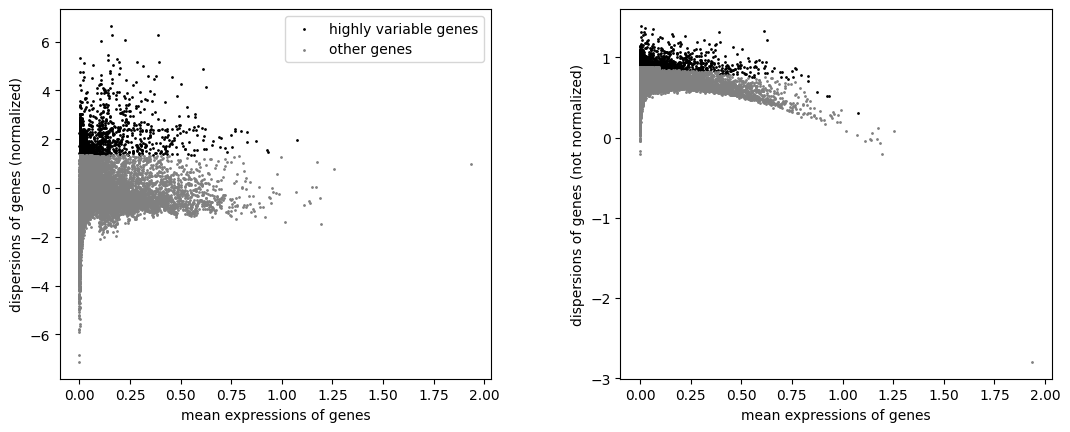

In [119]:
sc.pl.highly_variable_genes(adata)

In [121]:
adata=  adata[:,adata.var.highly_variable]

In [122]:
adata

View of AnnData object with n_obs × n_vars = 6082 × 2000
    obs: 'doublet', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo'
    var: 'mt', 'ribo', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'log1p', 'hvg'

In [124]:
#regress diffrences arising from 'total_counts','pct_counts_mt', 'pct_counts_ribo'
#some of the variations of the data due to processing, sequncing artfacts, low sample quality etc.

sc.pp.regress_out(adata, ['total_counts','pct_counts_mt', 'pct_counts_ribo' ])

In [128]:
sc.pp.scale(adata, max_value=10)

In [133]:
sc.tl.pca(adata, svd_solver='arpack')
#by default this reduces the dimensionality to 50 in a single component!

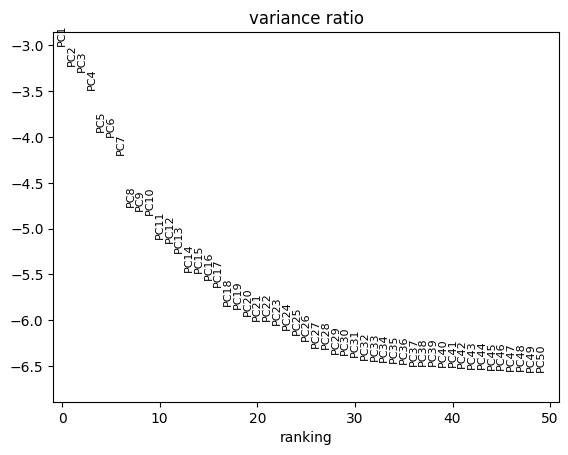

In [134]:
#run PCA
#plotting how much these PCs contribute to the data
#long data have more cell types than expected for smaller data. 
#I will go ahead with 30
sc.pl.pca_variance_ratio(adata,log=True,n_pcs=50)

In [138]:
sc.pp.neighbors(adata, n_pcs= 30)

In [140]:
adata

AnnData object with n_obs × n_vars = 6082 × 2000
    obs: 'doublet', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo'
    var: 'mt', 'ribo', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'log1p', 'hvg', 'pca', 'neighbors'
    obsm: 'X_pca'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'

In [142]:
#these ne matrixes in 'obsp' (i.e. 'distances', 'connectivities') is what would be used to do  the clustring
adata.obsp['distances'].toarray()

array([[ 0.        , 24.47611046,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [24.47611046,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ]])

In [143]:
adata.obsp['distances'].toarray()

array([[ 0.        , 24.47611046,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [24.47611046,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ]])

In [145]:
#now I will use UMAP to reduce dimensionality from 30 dimensions (i.e. above) to 2 dimensions. 
sc.tl.umap(adata)

/Users/hawraal-ghafli/.pyenv/versions/3.9.1/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  cax = scatter(


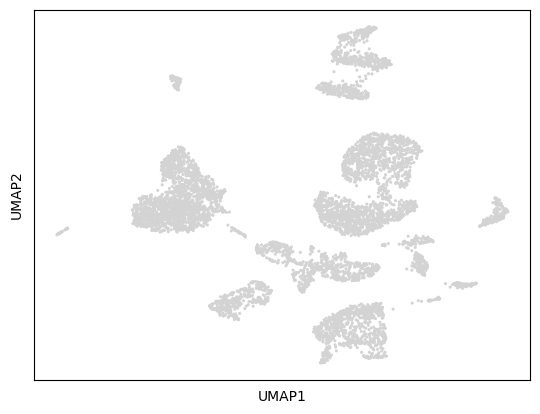

In [146]:
sc.pl.umap(adata)
#No colours in here ..processed  to cluster  with colours below 

In [148]:
#!pip install leidenalg

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 3.4 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 4.6 MB/s eta 0:00:0000:0100:01


In [151]:
sc.tl.leiden(adata,resolution=0.5)

In [152]:
adata.obs
#a col named 'leiden' is added  to the dataset to guid the  colour labelled clustering

,doublet,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt,total_counts_ribo,pct_counts_ribo,leiden
TAGGTACCATGGCCAC-1_1,False,6764,24256.0,153.0,0.630772,55.0,0.226748,6
ATTCACTGTAACAGGC-1_1,False,6686,19020.0,404.0,2.124080,115.0,0.604627,6
TAACTTCCAACCACGC-1_1,False,5158,15645.0,221.0,1.412592,211.0,1.348674,9
TTGGGTACACGACAAG-1_1,False,4900,15220.0,3.0,0.019711,5.0,0.032852,6
AGGCCACAGAGTCACG-1_1,False,5544,13217.0,417.0,3.155028,82.0,0.620413,6
...,...,...,...,...,...,...,...,...
CGCCATTGTTTGCCGG-1_1,False,355,410.0,3.0,0.731707,0.0,0.000000,6
CACTGGGGTCTACGTA-1_1,False,346,403.0,0.0,0.000000,0.0,0.000000,1
CATACTTGTAGAGGAA-1_1,False,360,410.0,2.0,0.487805,0.0,0.000000,0
TTTGGTTTCCACGGAC-1_1,False,299,405.0,0.0,0.000000,2.0,0.493827,12


/Users/hawraal-ghafli/.pyenv/versions/3.9.1/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


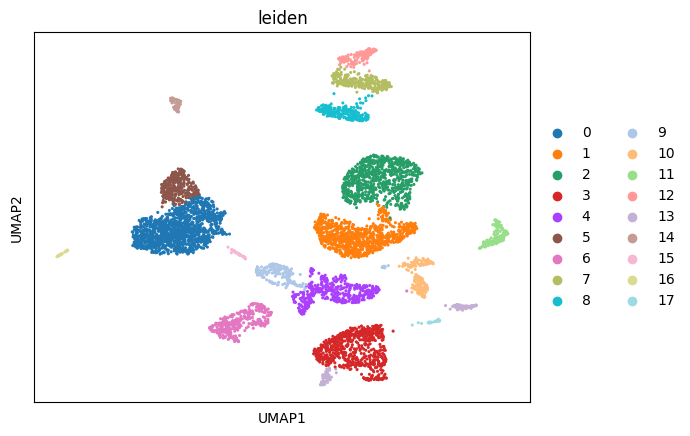

In [154]:
sc.pl.umap(adata, color=['leiden'])

# Integration of all samples

In [204]:
def pp(csv_path):
	adata=sc.read_csv(csv_path).T
	sc.pp.filter_genes(adata, min_cells=10)
	sc.pp.highly_variable_genes(adata, n_top_genes=2000, subset=True, flavor='seurat_v3')
	scvi.model.SCVI.setup_anndata(adata)
	vae=scvi.model.SCVI(adata)
	vae.train()
	solo=scvi.external.SOLO.from_scvi_model(vae)
	solo.train()
	df= solo.predict()
	df['prediction']=solo.predict(soft=False)
	df.index=df.index.map(lambda x: x[:-2])
	df['dif']=df.doublet- df.singlet
	doublets= df[(df.prediction == 'doublet')& (df.dif>1)]

	adata=sc.read_csv(csv_path).T
	adata.obs['Sample']=csv_path.split('_')[2] # this writes another col to the dataset named Sample, where the id (e.g. raw_data/GSM5226574_C51ctr_raw_counts.csv) will be split to chunks by the underscore so : chunk  0 =(raw), chunk  1 (data/GSM5226574) and chunk 2(C51ctr)...I will only maintain chunk 2
	adata.obs['doublet']=adata.obs.index.isin(doublets.index)
	adata=adata[~adata.obs.doublet]

	sc.pp.filter_cells(adata, min_genes=200) #get rid of cells with lower than 200 genes
	#not geting rid  of genes found in fewer than 3 cells at this stage, until they are combined. 
	#sc.pp.filter_genes(adata, min_cells=3)  
	adata.var['mt']= adata.var_names.str.startswith('mt-')#annotate the mito genes as  'mt'
	adata.var['ribo']=adata.var_names.isin(ribo_genes[0].values)
	sc.pp.calculate_qc_metrics(adata, qc_vars=['mt', 'ribo'], percent_top=None, log1p= False, inplace= True )
	upper_lim=np.quantile(adata.obs.n_genes_by_counts.values, .98)
	adata=adata[adata.obs.n_genes_by_counts<upper_lim]
	adata=adata[adata.obs.pct_counts_mt<20]
	adata=adata[adata.obs.pct_counts_ribo<2]
    
	return adata

In [ ]:
import os

In [205]:
os.listdir('raw_counts/')

['GSM5226578_C55ctr_raw_counts.csv',
 'GSM5226580_C57ctr_raw_counts.csv',
 'GSM5226576_C53ctr_raw_counts.csv',
 'GSM5226582_L03cov_raw_counts.csv',
 'GSM5226574_C51ctr_raw_counts.csv',
 'GSM5226575_C52ctr_raw_counts.csv',
 'GSM5226583_L04cov_raw_counts.csv',
 'GSM5226577_C54ctr_raw_counts.csv',
 'GSM5226581_L01cov_raw_counts.csv',
 'GSM5226579_C56ctr_raw_counts.csv']

In [206]:
out=[]
for file in os.listdir('raw_counts/'):
    out.append(pp('raw_counts/' + file))

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


Epoch 400/400: 100%|██████████████████████████████████████████████████████████████████████████| 400/400 [15:37<00:00,  2.29s/it, v_num=1, train_loss_step=282, train_loss_epoch=305]

`Trainer.fit` stopped: `max_epochs=400` reached.


Epoch 400/400: 100%|██████████████████████████████████████████████████████████████████████████| 400/400 [15:37<00:00,  2.34s/it, v_num=1, train_loss_step=282, train_loss_epoch=305]
INFO     Creating doublets, preparing SOLO model.                                                                  


GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


Epoch 280/400:  70%|█████████████████████████████████████████████████                     | 280/400 [02:02<00:52,  2.28it/s, v_num=1, train_loss_step=0.209, train_loss_epoch=0.223]
Monitored metric validation_loss did not improve in the last 30 records. Best score: 0.212. Signaling Trainer to stop.


/Users/hawraal-ghafli/.pyenv/versions/3.9.1/lib/python3.9/site-packages/scanpy/preprocessing/_simple.py:140: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs['n_genes'] = number
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


Epoch 400/400: 100%|██████████████████████████████████████████████████████████████████████████| 400/400 [13:06<00:00,  1.88s/it, v_num=1, train_loss_step=278, train_loss_epoch=288]

`Trainer.fit` stopped: `max_epochs=400` reached.


Epoch 400/400: 100%|██████████████████████████████████████████████████████████████████████████| 400/400 [13:06<00:00,  1.97s/it, v_num=1, train_loss_step=278, train_loss_epoch=288]
INFO     Creating doublets, preparing SOLO model.                                                                  


GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


Epoch 236/400:  59%|█████████████████████████████████████████▉                             | 236/400 [01:30<01:03,  2.59it/s, v_num=1, train_loss_step=1.63, train_loss_epoch=0.244]
Monitored metric validation_loss did not improve in the last 30 records. Best score: 0.234. Signaling Trainer to stop.


/Users/hawraal-ghafli/.pyenv/versions/3.9.1/lib/python3.9/site-packages/scanpy/preprocessing/_simple.py:140: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs['n_genes'] = number
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


Epoch 400/400: 100%|██████████████████████████████████████████████████████████████████████████| 400/400 [18:43<00:00,  3.43s/it, v_num=1, train_loss_step=318, train_loss_epoch=333]

`Trainer.fit` stopped: `max_epochs=400` reached.


Epoch 400/400: 100%|██████████████████████████████████████████████████████████████████████████| 400/400 [18:43<00:00,  2.81s/it, v_num=1, train_loss_step=318, train_loss_epoch=333]
INFO     Creating doublets, preparing SOLO model.                                                                  


GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


Epoch 198/400:  50%|██████████████████████████████████▋                                   | 198/400 [01:50<01:52,  1.79it/s, v_num=1, train_loss_step=0.578, train_loss_epoch=0.305]
Monitored metric validation_loss did not improve in the last 30 records. Best score: 0.306. Signaling Trainer to stop.


/Users/hawraal-ghafli/.pyenv/versions/3.9.1/lib/python3.9/site-packages/scanpy/preprocessing/_simple.py:140: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs['n_genes'] = number
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


Epoch 400/400: 100%|██████████████████████████████████████████████████████████████████████████| 400/400 [13:37<00:00,  1.98s/it, v_num=1, train_loss_step=420, train_loss_epoch=474]

`Trainer.fit` stopped: `max_epochs=400` reached.


Epoch 400/400: 100%|██████████████████████████████████████████████████████████████████████████| 400/400 [13:37<00:00,  2.04s/it, v_num=1, train_loss_step=420, train_loss_epoch=474]
INFO     Creating doublets, preparing SOLO model.                                                                  


GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


Epoch 126/400:  32%|██████████████████████                                                | 126/400 [00:48<01:45,  2.59it/s, v_num=1, train_loss_step=0.437, train_loss_epoch=0.356]
Monitored metric validation_loss did not improve in the last 30 records. Best score: 0.354. Signaling Trainer to stop.


/Users/hawraal-ghafli/.pyenv/versions/3.9.1/lib/python3.9/site-packages/scanpy/preprocessing/_simple.py:140: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs['n_genes'] = number
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


Epoch 400/400: 100%|██████████████████████████████████████████████████████████████████████████| 400/400 [15:47<00:00,  2.39s/it, v_num=1, train_loss_step=319, train_loss_epoch=324]

`Trainer.fit` stopped: `max_epochs=400` reached.


Epoch 400/400: 100%|██████████████████████████████████████████████████████████████████████████| 400/400 [15:48<00:00,  2.37s/it, v_num=1, train_loss_step=319, train_loss_epoch=324]
INFO     Creating doublets, preparing SOLO model.                                                                  


GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


Epoch 201/400:  50%|████████████████████████████████████▏                                   | 201/400 [01:31<01:30,  2.19it/s, v_num=1, train_loss_step=0.288, train_loss_epoch=0.3]
Monitored metric validation_loss did not improve in the last 30 records. Best score: 0.289. Signaling Trainer to stop.


/Users/hawraal-ghafli/.pyenv/versions/3.9.1/lib/python3.9/site-packages/scanpy/preprocessing/_simple.py:140: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs['n_genes'] = number
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


Epoch 400/400: 100%|██████████████████████████████████████████████████████████████████████████| 400/400 [12:02<00:00,  1.81s/it, v_num=1, train_loss_step=381, train_loss_epoch=397]

`Trainer.fit` stopped: `max_epochs=400` reached.


Epoch 400/400: 100%|██████████████████████████████████████████████████████████████████████████| 400/400 [12:02<00:00,  1.81s/it, v_num=1, train_loss_step=381, train_loss_epoch=397]
INFO     Creating doublets, preparing SOLO model.                                                                  


GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


Epoch 203/400:  51%|███████████████████████████████████▌                                  | 203/400 [01:11<01:08,  2.86it/s, v_num=1, train_loss_step=0.306, train_loss_epoch=0.299]
Monitored metric validation_loss did not improve in the last 30 records. Best score: 0.308. Signaling Trainer to stop.


/Users/hawraal-ghafli/.pyenv/versions/3.9.1/lib/python3.9/site-packages/scanpy/preprocessing/_simple.py:140: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs['n_genes'] = number
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


Epoch 400/400: 100%|██████████████████████████████████████████████████████████████████████████| 400/400 [09:41<00:00,  1.44s/it, v_num=1, train_loss_step=258, train_loss_epoch=258]

`Trainer.fit` stopped: `max_epochs=400` reached.


Epoch 400/400: 100%|██████████████████████████████████████████████████████████████████████████| 400/400 [09:41<00:00,  1.45s/it, v_num=1, train_loss_step=258, train_loss_epoch=258]
INFO     Creating doublets, preparing SOLO model.                                                                  


GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


Epoch 214/400:  54%|█████████████████████████████████████▉                                 | 214/400 [01:05<00:56,  3.29it/s, v_num=1, train_loss_step=0.34, train_loss_epoch=0.278]
Monitored metric validation_loss did not improve in the last 30 records. Best score: 0.295. Signaling Trainer to stop.


/Users/hawraal-ghafli/.pyenv/versions/3.9.1/lib/python3.9/site-packages/scanpy/preprocessing/_simple.py:140: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs['n_genes'] = number
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


Epoch 400/400: 100%|██████████████████████████████████████████████████████████████████████████| 400/400 [11:51<00:00,  1.75s/it, v_num=1, train_loss_step=309, train_loss_epoch=308]

`Trainer.fit` stopped: `max_epochs=400` reached.


Epoch 400/400: 100%|██████████████████████████████████████████████████████████████████████████| 400/400 [11:51<00:00,  1.78s/it, v_num=1, train_loss_step=309, train_loss_epoch=308]
INFO     Creating doublets, preparing SOLO model.                                                                  


GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


Epoch 224/400:  56%|███████████████████████████████████████▏                              | 224/400 [01:16<01:00,  2.91it/s, v_num=1, train_loss_step=0.186, train_loss_epoch=0.235]
Monitored metric validation_loss did not improve in the last 30 records. Best score: 0.229. Signaling Trainer to stop.


/Users/hawraal-ghafli/.pyenv/versions/3.9.1/lib/python3.9/site-packages/scanpy/preprocessing/_simple.py:140: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs['n_genes'] = number
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


Epoch 400/400: 100%|██████████████████████████████████████████████████████████████████████████| 400/400 [08:14<00:00,  1.19s/it, v_num=1, train_loss_step=301, train_loss_epoch=333]

`Trainer.fit` stopped: `max_epochs=400` reached.


Epoch 400/400: 100%|██████████████████████████████████████████████████████████████████████████| 400/400 [08:14<00:00,  1.24s/it, v_num=1, train_loss_step=301, train_loss_epoch=333]
INFO     Creating doublets, preparing SOLO model.                                                                  


GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


Epoch 236/400:  59%|█████████████████████████████████████████▎                            | 236/400 [00:58<00:40,  4.04it/s, v_num=1, train_loss_step=0.269, train_loss_epoch=0.266]
Monitored metric validation_loss did not improve in the last 30 records. Best score: 0.300. Signaling Trainer to stop.


/Users/hawraal-ghafli/.pyenv/versions/3.9.1/lib/python3.9/site-packages/scanpy/preprocessing/_simple.py:140: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs['n_genes'] = number
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


Epoch 400/400: 100%|██████████████████████████████████████████████████████████████████████████| 400/400 [11:31<00:00,  1.65s/it, v_num=1, train_loss_step=330, train_loss_epoch=327]

`Trainer.fit` stopped: `max_epochs=400` reached.


Epoch 400/400: 100%|██████████████████████████████████████████████████████████████████████████| 400/400 [11:31<00:00,  1.73s/it, v_num=1, train_loss_step=330, train_loss_epoch=327]
INFO     Creating doublets, preparing SOLO model.                                                                  


GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


Epoch 275/400:  69%|████████████████████████████████████████████████▏                     | 275/400 [01:34<00:42,  2.92it/s, v_num=1, train_loss_step=0.311, train_loss_epoch=0.248]
Monitored metric validation_loss did not improve in the last 30 records. Best score: 0.243. Signaling Trainer to stop.


/Users/hawraal-ghafli/.pyenv/versions/3.9.1/lib/python3.9/site-packages/scanpy/preprocessing/_simple.py:140: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs['n_genes'] = number


In [208]:
out[0]

View of AnnData object with n_obs × n_vars = 5565 × 34546
    obs: 'Sample', 'doublet', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo'
    var: 'mt', 'ribo', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'

In [209]:
adata=sc.concat(out)

In [212]:
adata

AnnData object with n_obs × n_vars = 46049 × 34546
    obs: 'Sample', 'doublet', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo'

In [213]:
adata.obs

,Sample,doublet,n_genes,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt,total_counts_ribo,pct_counts_ribo
TCATATCTCTTCTAAC-1_5,C55ctr,False,1535,1535,4616.0,0.0,0.0,0.0,0.000000
TGCAGTAAGGCCACCT-1_5,C55ctr,False,1476,1476,4428.0,0.0,0.0,3.0,0.067751
CGGGACTAGTCACTCA-1_5,C55ctr,False,1607,1607,3857.0,0.0,0.0,1.0,0.025927
ACCTGTCCAGGGTCTC-1_5,C55ctr,False,1592,1592,3913.0,0.0,0.0,0.0,0.000000
CACAGGCTCGCATTGA-1_5,C55ctr,False,1603,1603,3685.0,0.0,0.0,3.0,0.081411
...,...,...,...,...,...,...,...,...,...
CGAGTGCCAGAGGGTT-1_6,C56ctr,False,365,365,411.0,0.0,0.0,0.0,0.000000
TTTCGATGTTGATGTC-1_6,C56ctr,False,330,330,407.0,0.0,0.0,0.0,0.000000
GTTGTCCCAATGTCTG-1_6,C56ctr,False,360,360,412.0,0.0,0.0,0.0,0.000000
CTCTCAGAGGTGCATG-1_6,C56ctr,False,354,354,406.0,0.0,0.0,0.0,0.000000


In [214]:
sc.pp.filter_genes(adata,min_cells=10)

In [215]:
adata.X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [217]:
from scipy.sparse import csr_matrix

In [218]:
adata.X=csr_matrix(adata.X)

In [219]:
adata

AnnData object with n_obs × n_vars = 46049 × 27251
    obs: 'Sample', 'doublet', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo'
    var: 'n_cells'

In [220]:
adata.write_h5ad

<bound method AnnData.write_h5ad of AnnData object with n_obs × n_vars = 46049 × 27251
    obs: 'Sample', 'doublet', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo'
    var: 'n_cells'>

In [222]:
import scanpy as sc
import scvi
import seaborn as sns
import numpy as np
import pandas as pd

In [223]:
adata.write_h5ad('combined.h5ad')

In [225]:
adata.obs.groupby('Sample').count()

,doublet,n_genes,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt,total_counts_ribo,pct_counts_ribo
Sample,,,,,,,,
C51ctr,5960,5960,5960,5960,5960,5960,5960,5960
C52ctr,4415,4415,4415,4415,4415,4415,4415,4415
C53ctr,6928,6928,6928,6928,6928,6928,6928,6928
C54ctr,4284,4284,4284,4284,4284,4284,4284,4284
C55ctr,5565,5565,5565,5565,5565,5565,5565,5565
C56ctr,3904,3904,3904,3904,3904,3904,3904,3904
C57ctr,4687,4687,4687,4687,4687,4687,4687,4687
L01cov,2952,2952,2952,2952,2952,2952,2952,2952
L03cov,3953,3953,3953,3953,3953,3953,3953,3953


In [226]:
sc.pp.filter_genes(adata, min_cells=100)

In [227]:
adata

AnnData object with n_obs × n_vars = 46049 × 18635
    obs: 'Sample', 'doublet', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo'
    var: 'n_cells'

In [228]:
adata.layers['counts']=adata.X.copy()
sc.pp.normalize_total(adata, target_sum=1e4)
sc.pp.log1p(adata)
adata.raw=adata

In [232]:
adata.obs.head()

,Sample,doublet,n_genes,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt,total_counts_ribo,pct_counts_ribo
TCATATCTCTTCTAAC-1_5,C55ctr,False,1535,1535,4616.0,0.0,0.0,0.0,0.000000
TGCAGTAAGGCCACCT-1_5,C55ctr,False,1476,1476,4428.0,0.0,0.0,3.0,0.067751
CGGGACTAGTCACTCA-1_5,C55ctr,False,1607,1607,3857.0,0.0,0.0,1.0,0.025927
ACCTGTCCAGGGTCTC-1_5,C55ctr,False,1592,1592,3913.0,0.0,0.0,0.0,0.000000
CACAGGCTCGCATTGA-1_5,C55ctr,False,1603,1603,3685.0,0.0,0.0,3.0,0.081411


In [230]:
adata

In [237]:
scvi.model.SCVI.setup_anndata(adata, layer='counts', 
                             categorical_covariate_keys=["Sample"],
                             continuous_covariate_keys=['pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo'])

In [238]:
model=scvi.model.SCVI(adata)

In [239]:
model.train()

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


Epoch 174/174: 100%|████████████████████████████████████████████████████████████████████████| 174/174 [1:21:37<00:00, 27.88s/it, v_num=1, train_loss_step=487, train_loss_epoch=507]

`Trainer.fit` stopped: `max_epochs=174` reached.


Epoch 174/174: 100%|████████████████████████████████████████████████████████████████████████| 174/174 [1:21:37<00:00, 28.15s/it, v_num=1, train_loss_step=487, train_loss_epoch=507]


In [241]:
adata.obsm['X_scVI']=model.get_latent_representation()

In [243]:
adata.layers['scvi_normalized']=model.get_normalized_expression(library_size=1e4)

In [244]:
sc.pp.neighbors(adata, use_rep ='X_scVI')

In [245]:
sc.tl.umap(adata)
sc.tl.leiden(adata, resolution=0.05)

In [246]:
adata.obs

,Sample,doublet,n_genes,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt,total_counts_ribo,pct_counts_ribo,_scvi_batch,_scvi_labels,leiden
TCATATCTCTTCTAAC-1_5,C55ctr,False,1535,1535,4616.0,0.0,0.0,0.0,0.000000,0,0,0
TGCAGTAAGGCCACCT-1_5,C55ctr,False,1476,1476,4428.0,0.0,0.0,3.0,0.067751,0,0,0
CGGGACTAGTCACTCA-1_5,C55ctr,False,1607,1607,3857.0,0.0,0.0,1.0,0.025927,0,0,0
ACCTGTCCAGGGTCTC-1_5,C55ctr,False,1592,1592,3913.0,0.0,0.0,0.0,0.000000,0,0,0
CACAGGCTCGCATTGA-1_5,C55ctr,False,1603,1603,3685.0,0.0,0.0,3.0,0.081411,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
CGAGTGCCAGAGGGTT-1_6,C56ctr,False,365,365,411.0,0.0,0.0,0.0,0.000000,0,0,6
TTTCGATGTTGATGTC-1_6,C56ctr,False,330,330,407.0,0.0,0.0,0.0,0.000000,0,0,2
GTTGTCCCAATGTCTG-1_6,C56ctr,False,360,360,412.0,0.0,0.0,0.0,0.000000,0,0,6
CTCTCAGAGGTGCATG-1_6,C56ctr,False,354,354,406.0,0.0,0.0,0.0,0.000000,0,0,6


/Users/hawraal-ghafli/.pyenv/versions/3.9.1/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


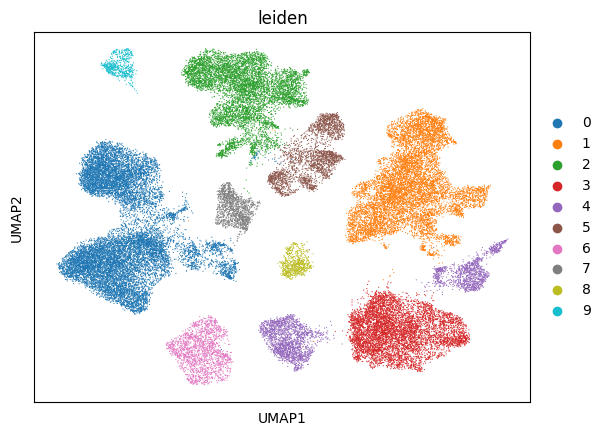

In [247]:
sc.pl.umap(adata, color=['leiden'])

In [ ]:
adata.write_h5ad('integrated.h5ad')

# find markers |label cell types

In [250]:
sc.tl.rank_genes_groups(adata, 'leiden')

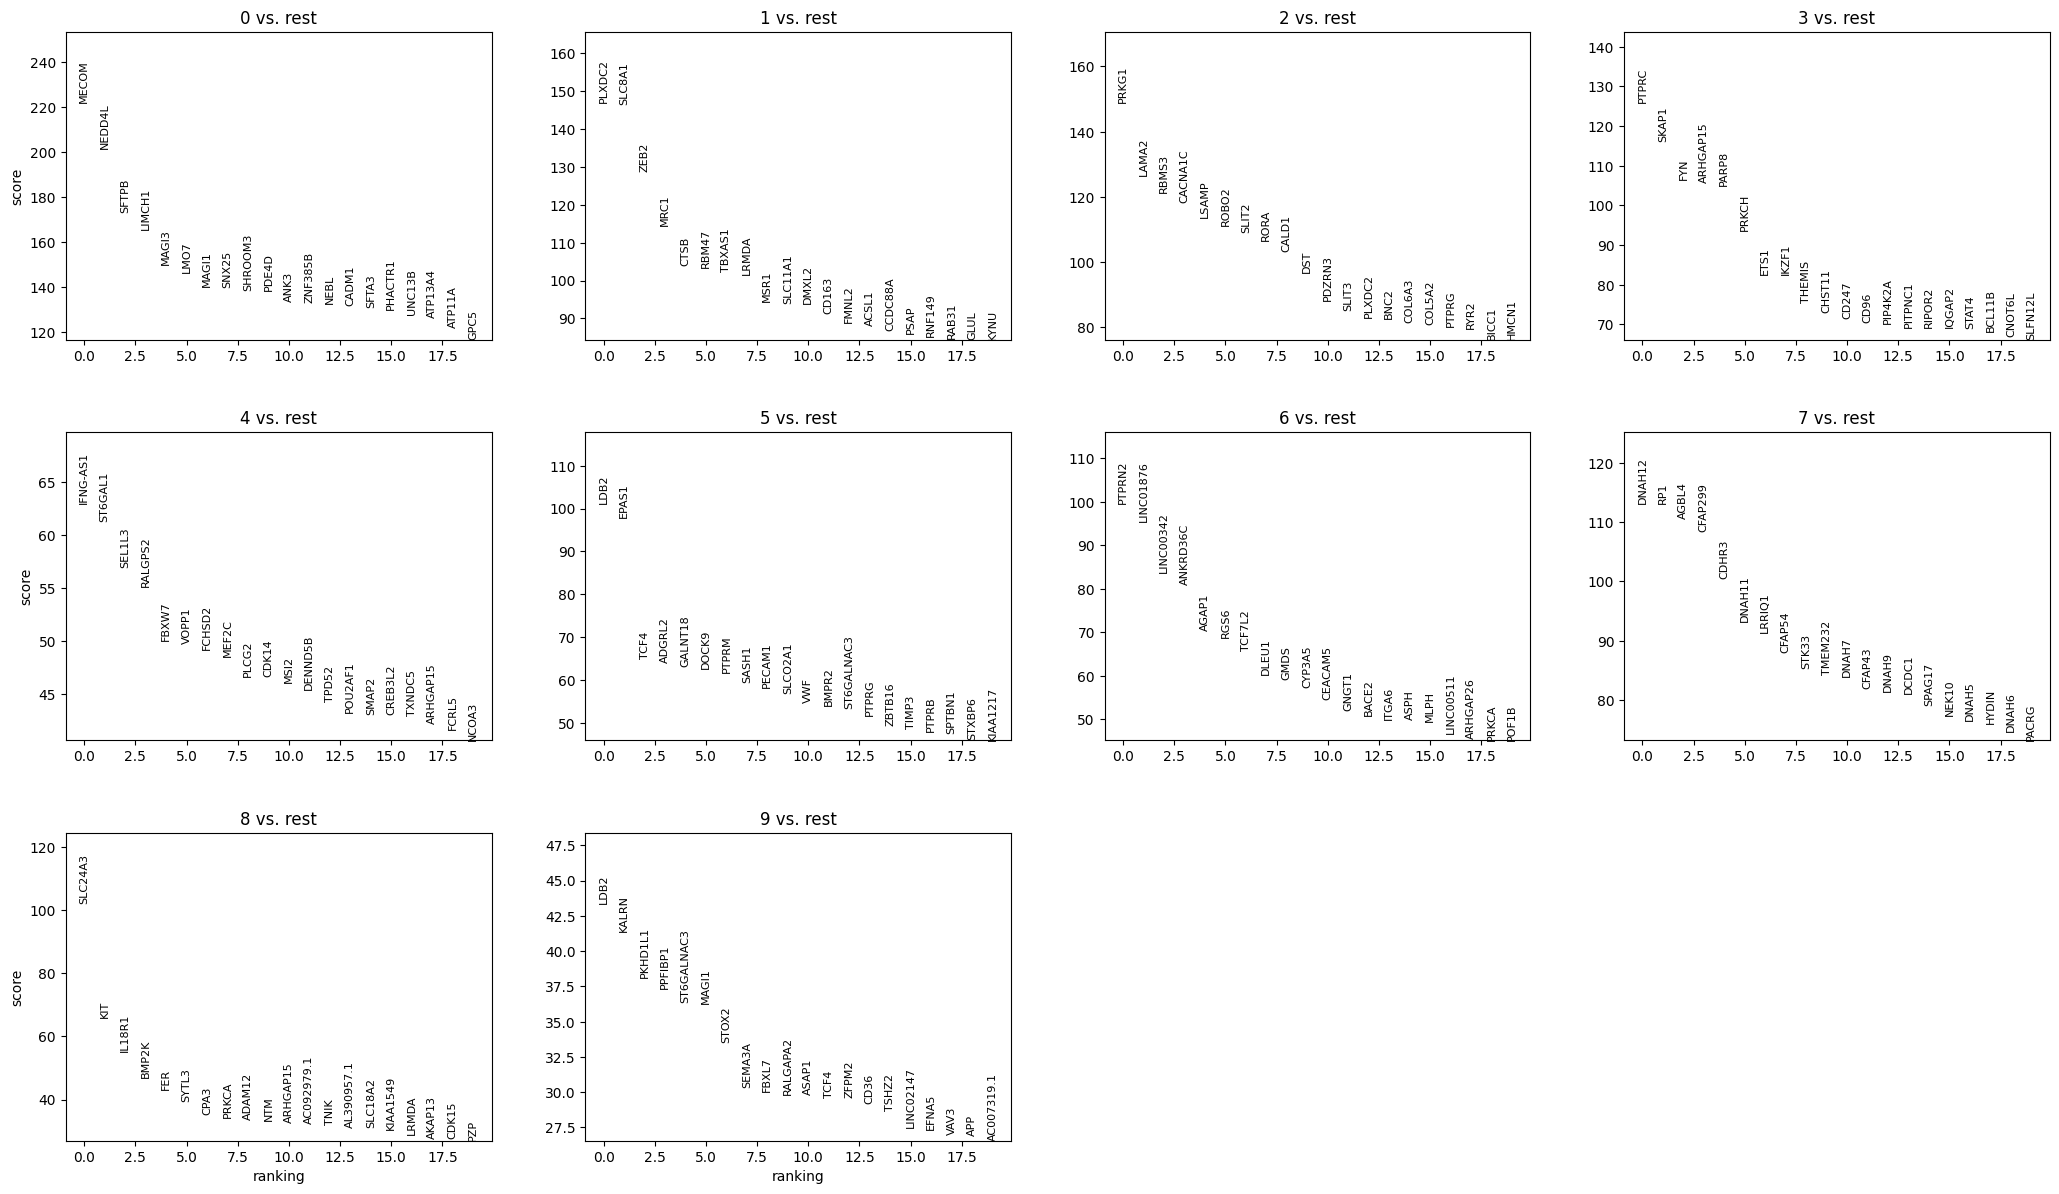

In [251]:
sc.pl.rank_genes_groups(adata, n_genes=20, sharey=False)

In [254]:
markers=sc.get.rank_genes_groups_df(adata, None)
markers= markers[(markers.pvals_adj <0.05) & (markers.logfoldchanges>0.5)]
markers

,group,names,scores,logfoldchanges,pvals,pvals_adj
0,0,MECOM,221.661285,5.699473,0.000000,0.000000
1,0,NEDD4L,201.265793,5.648821,0.000000,0.000000
2,0,SFTPB,173.054153,10.341912,0.000000,0.000000
3,0,LIMCH1,165.734421,4.634433,0.000000,0.000000
4,0,MAGI3,150.175491,4.714639,0.000000,0.000000
...,...,...,...,...,...,...
169984,9,NAALAD2,2.287961,1.495662,0.022501,0.049071
169985,9,AL627308.3,2.287898,2.719839,0.022507,0.049073
169986,9,FUT11,2.285102,1.004832,0.022669,0.049401
169988,9,TIMM23B-AGAP6,2.282669,1.141511,0.022812,0.049690


In [255]:
markers_scvi=model.differential_expression(groupby ='leiden')

DE...: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [01:27<00:00,  8.78s/it]


In [256]:
markers_scvi

,proba_de,proba_not_de,bayes_factor,scale1,scale2,pseudocounts,delta,lfc_mean,lfc_median,lfc_std,...,raw_mean1,raw_mean2,non_zeros_proportion1,non_zeros_proportion2,raw_normalized_mean1,raw_normalized_mean2,is_de_fdr_0.05,comparison,group1,group2
ATP13A4,0.9994,0.0006,7.417964,0.003423,0.000053,0.0,0.25,9.262911,8.642448,3.916279,...,1.465209,0.020567,0.580271,0.013774,33.768227,0.344671,True,0 vs Rest,0,Rest
SFTA3,0.9990,0.0010,6.906745,0.002848,0.000031,0.0,0.25,8.635345,8.408333,3.164535,...,1.377450,0.007105,0.585429,0.005329,31.264809,0.135269,True,0 vs Rest,0,Rest
HOPX,0.9988,0.0012,6.724225,0.001651,0.000035,0.0,0.25,6.357654,6.247627,2.122098,...,0.700071,0.002555,0.344581,0.002057,14.761278,0.073115,True,0 vs Rest,0,Rest
SFTPB,0.9988,0.0012,6.724225,0.025819,0.000189,0.0,0.25,9.358288,9.054897,3.883502,...,12.812050,0.029448,0.708790,0.006139,278.117401,0.585154,True,0 vs Rest,0,Rest
AL132857.1,0.9986,0.0014,6.569875,0.001860,0.000024,0.0,0.25,8.825928,8.422504,3.686087,...,0.923527,0.007479,0.459274,0.006014,20.722382,0.114076,True,0 vs Rest,0,Rest
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ATF6,0.8006,0.1994,1.390049,0.000943,0.000899,0.0,0.25,0.297526,0.264443,0.942739,...,0.595446,0.324251,0.348511,0.233827,12.647150,10.349023,False,9 vs Rest,9,Rest
RANBP2,0.7960,0.2040,1.361479,0.000441,0.000581,0.0,0.25,-0.214717,-0.231539,0.937114,...,0.208406,0.201646,0.159370,0.158494,4.518288,6.452997,False,9 vs Rest,9,Rest
KIF1B,0.7904,0.2096,1.327338,0.000884,0.000915,0.0,0.25,0.184241,0.178124,0.998074,...,0.476357,0.400642,0.285464,0.252957,9.809431,10.471688,False,9 vs Rest,9,Rest
FDX1,0.7854,0.2146,1.297417,0.000133,0.000179,0.0,0.25,-0.241731,-0.212093,0.975080,...,0.075306,0.064516,0.056042,0.052399,1.557968,1.707043,False,9 vs Rest,9,Rest


In [258]:
#filter the dataset,
markers_scvi=markers_scvi[(markers_scvi['is_de_fdr_0.05'])&(markers_scvi.lfc_mean>.5)]
markers_scvi

,proba_de,proba_not_de,bayes_factor,scale1,scale2,pseudocounts,delta,lfc_mean,lfc_median,lfc_std,...,raw_mean1,raw_mean2,non_zeros_proportion1,non_zeros_proportion2,raw_normalized_mean1,raw_normalized_mean2,is_de_fdr_0.05,comparison,group1,group2
ATP13A4,0.9994,0.0006,7.417964,0.003423,0.000053,0.0,0.25,9.262911,8.642448,3.916279,...,1.465209,0.020567,0.580271,0.013774,33.768227,0.344671,True,0 vs Rest,0,Rest
SFTA3,0.9990,0.0010,6.906745,0.002848,0.000031,0.0,0.25,8.635345,8.408333,3.164535,...,1.377450,0.007105,0.585429,0.005329,31.264809,0.135269,True,0 vs Rest,0,Rest
HOPX,0.9988,0.0012,6.724225,0.001651,0.000035,0.0,0.25,6.357654,6.247627,2.122098,...,0.700071,0.002555,0.344581,0.002057,14.761278,0.073115,True,0 vs Rest,0,Rest
SFTPB,0.9988,0.0012,6.724225,0.025819,0.000189,0.0,0.25,9.358288,9.054897,3.883502,...,12.812050,0.029448,0.708790,0.006139,278.117401,0.585154,True,0 vs Rest,0,Rest
AL132857.1,0.9986,0.0014,6.569875,0.001860,0.000024,0.0,0.25,8.825928,8.422504,3.686087,...,0.923527,0.007479,0.459274,0.006014,20.722382,0.114076,True,0 vs Rest,0,Rest
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SLC26A7,0.9116,0.0884,2.333329,0.000023,0.000025,0.0,0.25,0.591570,0.575669,2.014502,...,0.005254,0.003892,0.005254,0.003518,0.172769,0.138312,True,9 vs Rest,9,Rest
AP002518.2,0.9114,0.0886,2.330850,0.000939,0.000900,0.0,0.25,0.848293,0.762823,1.940559,...,0.369527,0.336398,0.220665,0.173776,8.754282,8.334809,True,9 vs Rest,9,Rest
LEPR,0.9114,0.0886,2.330850,0.000270,0.000255,0.0,0.25,1.310230,1.119222,2.185198,...,0.112084,0.091627,0.082312,0.058908,2.422275,2.525995,True,9 vs Rest,9,Rest
CADM2,0.9114,0.0886,2.330850,0.000030,0.000043,0.0,0.25,0.601233,0.571242,2.292850,...,0.010508,0.014029,0.010508,0.009169,0.280443,0.344222,True,9 vs Rest,9,Rest


/Users/hawraal-ghafli/.pyenv/versions/3.9.1/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/Users/hawraal-ghafli/.pyenv/versions/3.9.1/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


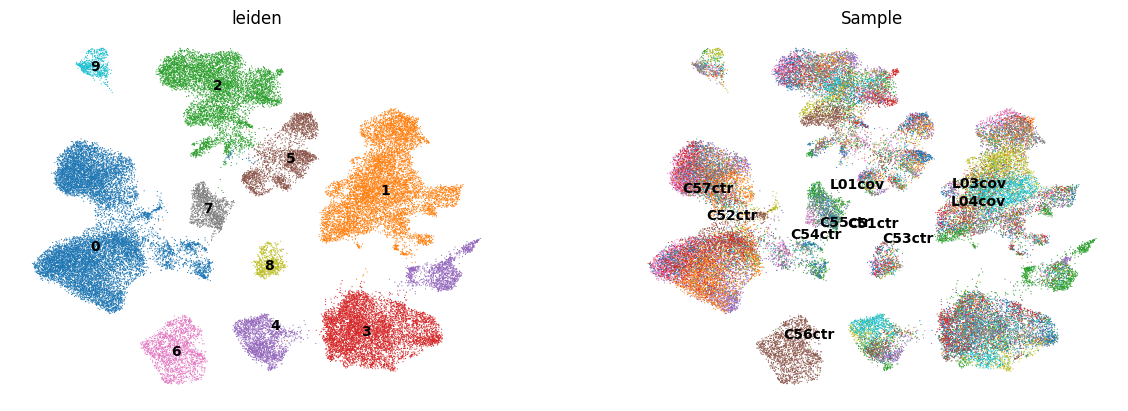

In [266]:
sc.pl.umap(adata, color=['leiden', "Sample"], frameon=False, legend_loc="on data")

In [262]:
for x in range(0,9): 
    print(f'"{x}":"",')

"0":"",
"1":"",
"2":"",
"3":"",
"4":"",
"5":"",
"6":"",
"7":"",
"8":"",


In [ ]:
"0":"",
"1":"",
"2":"",
"3":"CD8A",
"4":"",
"5":"",
"6":"",
"7":"",
"8":"",

In [269]:
sc.tl.umap(adata)
sc.tl.leiden(adata, resolution=1)

/Users/hawraal-ghafli/.pyenv/versions/3.9.1/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


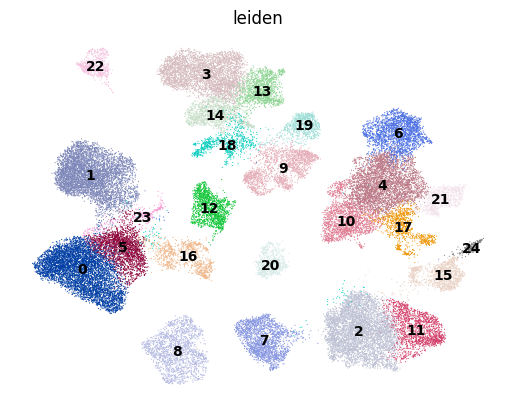

In [295]:
sc.pl.umap(adata, color=['leiden'], frameon=False, legend_loc="on data")

In [292]:
sc.pl.umap(adata, color=['APOBEC3A','CD14'], frameon=False, layer="scvi_normalized")

KeyError: 'Could not find key APOBEC3A in .var_names or .obs.columns.'

<Figure size 1455.6x480 with 0 Axes>

In [294]:
sc.pl.umap(adata, color=['PTPRC','ZBTB46'], frameon=False,)

SyntaxError: positional argument follows keyword argument (1855752797.py, line 1)

In [284]:
markers[markers.names=='POSTN']

,group,names,scores,logfoldchanges,pvals,pvals_adj
38007,2,POSTN,18.471178,3.719065,2.087187e-74,1.462758e-73
93778,5,POSTN,10.603032,2.797725,9.812455e-26,4.263350e-25


In [288]:
markers

,group,names,scores,logfoldchanges,pvals,pvals_adj
0,0,MECOM,221.661285,5.699473,0.000000,0.000000
1,0,NEDD4L,201.265793,5.648821,0.000000,0.000000
2,0,SFTPB,173.054153,10.341912,0.000000,0.000000
3,0,LIMCH1,165.734421,4.634433,0.000000,0.000000
4,0,MAGI3,150.175491,4.714639,0.000000,0.000000
...,...,...,...,...,...,...
169984,9,NAALAD2,2.287961,1.495662,0.022501,0.049071
169985,9,AL627308.3,2.287898,2.719839,0.022507,0.049073
169986,9,FUT11,2.285102,1.004832,0.022669,0.049401
169988,9,TIMM23B-AGAP6,2.282669,1.141511,0.022812,0.049690


KeyError: 'CLDN18CDH1'

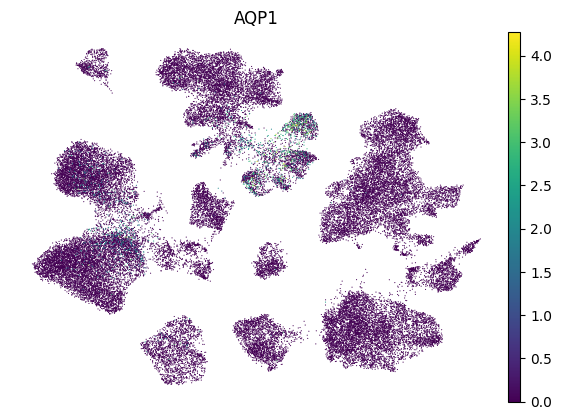

In [290]:
#from bangolaDB get markers for similar markers in  similar tissues
sc.pl.umap(adata, color=['AQP1','CLDN18''CDH1'], frameon=False)


In [ ]:
sc.pp.highly_variable_genes(adata, n_top_genes=3000, subset= True, layer='counts',
                           flavor='seurat_v3', batch_key="Sample")